In [234]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score # accuracy
from sklearn.preprocessing import StandardScaler #Estándarizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns = 
                  ['sepal length (cm)',
                   'sepal width (cm)',
                   'petal length (cm)',
                   'petal width (cm)'])
df_target = pd.DataFrame(iris.target , columns = ['taeget'])
df = pd.concat([df_target,df], axis = 1)

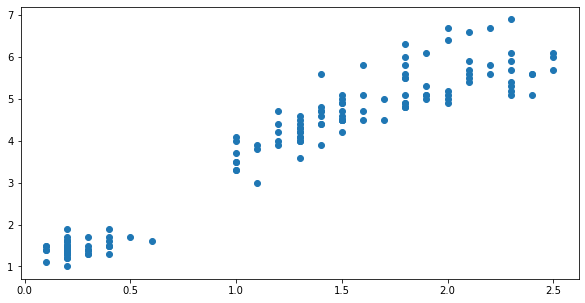

In [26]:
plt.figure(figsize= (10,5))
plt.scatter(df['petal width (cm)'],df['petal length (cm)'])
plt.show()

In [35]:
df.iloc[:,1:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
X = df.iloc[:,1:]
y = df.iloc[:,:1].values.reshape(-1)

## Modelo

In [180]:
def k_mean(X, y, max_iter = 1000 , k_max = 4):
    lst_k = {}
    
    
    for i in range(1 ,k_max + 1 ):
        lst_iter = []
        for j in range(max_iter + 1):
            model = KMeans(n_clusters=i , max_iter=j+1).fit(X)
            y_predict = model.predict(X)
            accuracy = adjusted_rand_score(y,y_predict)
            lst_iter.append(accuracy)

            if j % 500 == 0:
                print(f'vuelta {j} de {max_iter}')
        print(f'k número {i}')
        
        lst_k[f'{i}'] = lst_iter
    
    return lst_k

In [181]:
k_dic = k_mean(X, y )

vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 1
vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 2
vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 3
vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 4


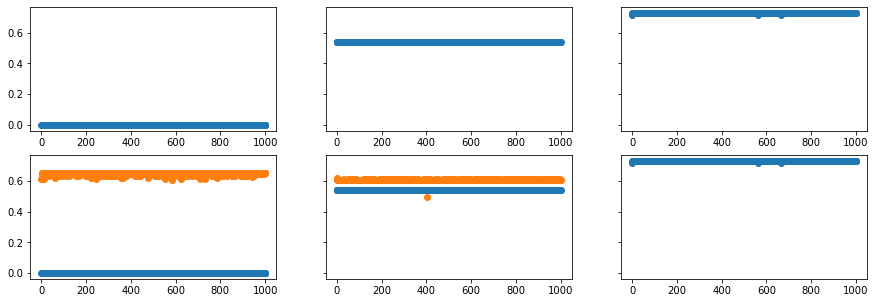

In [164]:
fig , ax = plt.subplots(2,3, sharey=True, figsize = (15,5))
for idx , i in enumerate(k_dic.keys()):
    if idx <= 2:
        ax[0,idx].scatter(range(1000 + 1 ), k_dic[i])
        
    ax[1,(idx-3)].scatter(range(1000 + 1 ), k_dic[i])

plt.show()

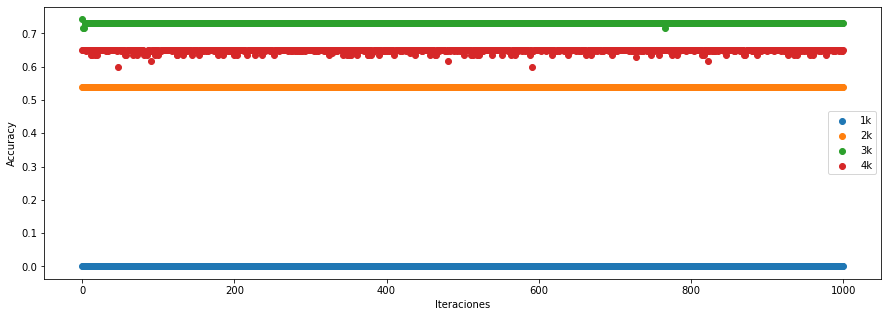

In [184]:
plt.figure(figsize = (15,5))
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
# plots
plt.scatter(range(1000 + 1 ), k_dic['1'], label = '1k')
plt.scatter(range(1000 + 1 ), k_dic['2'], label = '2k')
plt.scatter(range(1000 + 1 ), k_dic['3'], label = '3k')
plt.scatter(range(1000 + 1 ), k_dic['4'], label = '4k')
#plt.scatter(range(1000 + 1 ), k_dic['5'], label = '5k')

plt.legend()



plt.show()

In [187]:
lst_values= [np.mean(v) for v in k_dic.values()]

Text(0, 0.5, 'accuracy')

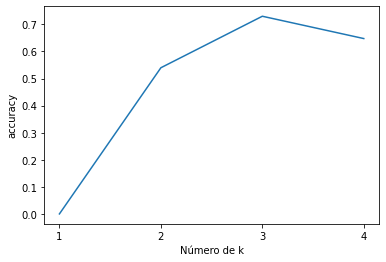

In [191]:
plt.plot(['1','2','3','4'], lst_values)
plt.xlabel('Número de k')
plt.ylabel('accuracy')

Aplicar el modelo más efectivo, que es con 3 k 

In [208]:
model = KMeans(n_clusters=3 , max_iter=10000).fit(X)
y_predict = model.predict(X)
accuracy = adjusted_rand_score(y,y_predict)

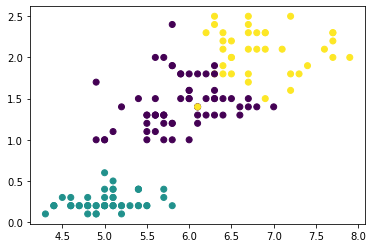

In [209]:
plt.scatter(X['sepal length (cm)'], X['petal width (cm)'] , c = y_predict)
plt.show()

# Wine data frame

In [210]:
wine = datasets.load_wine()

In [218]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [283]:
df_wine = pd.DataFrame(wine.data, columns = ['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline'])

df_wine['target'] = wine.target

In [222]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Modelo

In [248]:
X_wine = df_wine.iloc[:,:-1]
y_wine = df_wine['target']

In [230]:
lista_wines = k_mean(X_wine,y_wine)

vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 1
vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 2
vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 3
vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 4


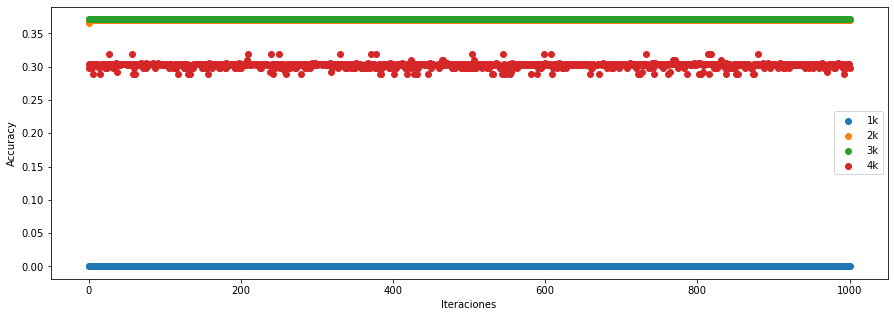

In [232]:
plt.figure(figsize = (15,5))
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
# plots
plt.scatter(range(1000 + 1 ), lista_wines['1'], label = '1k')
plt.scatter(range(1000 + 1 ), lista_wines['2'], label = '2k')
plt.scatter(range(1000 + 1 ), lista_wines['3'], label = '3k')
plt.scatter(range(1000 + 1 ), lista_wines['4'], label = '4k')
#plt.scatter(range(1000 + 1 ), k_dic['5'], label = '5k')

plt.legend()



plt.show()

El accurancy esta muy bajo, se debe a que los datos del data set no estan estándarizados. Para eso hay que llevar $\mu = 0$ y $\sigma = 1$

In [237]:
X_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [249]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_wine)

In [253]:
df_wine = pd.DataFrame(X_new, columns = ['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline'])

In [259]:
df_wine.describe().loc[['mean','std']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


In [260]:
lista_wines = k_mean(X_new,y_wine)

vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 1
vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 2
vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 3
vuelta 0 de 1000
vuelta 500 de 1000
vuelta 1000 de 1000
k número 4


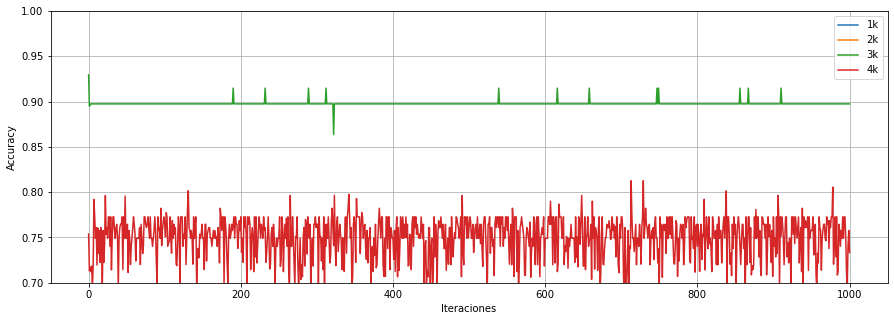

In [265]:
plt.figure(figsize = (15,5))
plt.xlabel('Iteraciones')
plt.ylabel('Accuracy')
# plots
plt.plot(range(1000 + 1 ), lista_wines['1'], label = '1k')
plt.plot(range(1000 + 1 ), lista_wines['2'], label = '2k')
plt.plot(range(1000 + 1 ), lista_wines['3'], label = '3k')
plt.plot(range(1000 + 1 ), lista_wines['4'], label = '4k')
#plt.scatter(range(1000 + 1 ), k_dic['5'], label = '5k')

plt.legend()
plt.ylim(0.7,1)
plt.grid()

plt.show()

In [266]:
model = KMeans(n_clusters=3 , max_iter=1000).fit(X_new)
y_predict = model.predict(X_new)
accuracy = adjusted_rand_score(y_wine,y_predict)

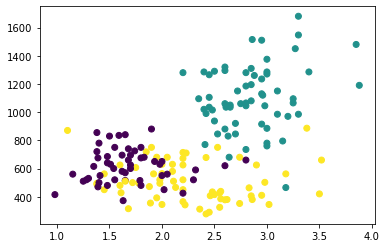

In [284]:
plt.scatter(df_wine['total_phenols'],df_wine['proline'], c = y_predict)
plt.show()